# Shortest city tour (solution)

Find the shortest path through a set of streets, solution of the first example.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Problem definition

In [3]:
from ensae_projects.datainc.data_geo_streets import get_seattle_streets, shapely_records
from ensae_projects.datainc.data_geo_streets import seattle_streets_set_small, folium_html_street_map

name = get_seattle_streets()
shapes, records, fields = shapely_records(name)
edges_index, edges, vertices, distances = seattle_streets_set_small(shapes, records)
folium_html_street_map(edges_index, shapes, html_width="80%", zoom_start=15)

<pyensae.notebookhelper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0x1e913fa9710>

We display a simplified map.

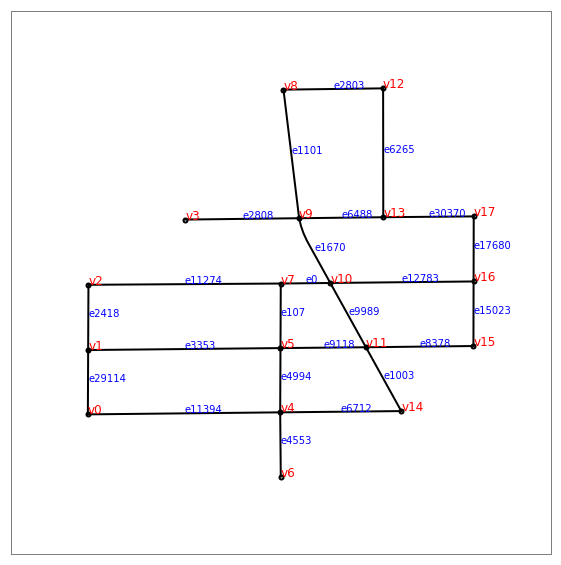

In [4]:
from ensae_projects.datainc.data_geo_streets import plot_streets_network
plot_streets_network(edges_index, edges, vertices, shapes, figsize=(10,10));

## Eulerian path

A solution is a set of indices of edges. Let's try `edges_index` without one edge as a solution.

In [5]:
from ensae_projects.challenge.city_tour import best_euler_path
couples, solution, distance = best_euler_path(edges_index=edges_index, edges=edges,
                                              distances=distances, vertices=vertices, fLOG=print)
"distance", distance

[best_euler_path] distance_vertices #edges=24
[best_euler_path] bellman_distances
[bellman_distances] iteration=1 modif=74 #dist=122 sum_values=0.26812913941842903 avg=0.0021977798312985985
[bellman_distances] iteration=2 modif=102 #dist=214 sum_values=0.6638654574495177 avg=0.0031021750348108304
[bellman_distances] iteration=3 modif=130 #dist=298 sum_values=1.3475652021993083 avg=0.004522030879863451
[bellman_distances] iteration=4 modif=100 #dist=306 sum_values=1.3653257205807 avg=0.004461848760067647
[bellman_distances] iteration=5 modif=64 #dist=306 sum_values=1.2780455413890799 avg=0.0041766194163041824
[bellman_distances] iteration=6 modif=42 #dist=306 sum_values=1.2282394949878546 avg=0.0040138545587838385
[bellman_distances] iteration=7 modif=24 #dist=306 sum_values=1.207369883828586 avg=0.003945653215126098
[bellman_distances] iteration=8 modif=12 #dist=306 sum_values=1.1964121229039824 avg=0.003909843538901903
[bellman_distances] iteration=9 modif=10 #dist=306 sum_values=1.18

('distance', 0.04360778144581235)

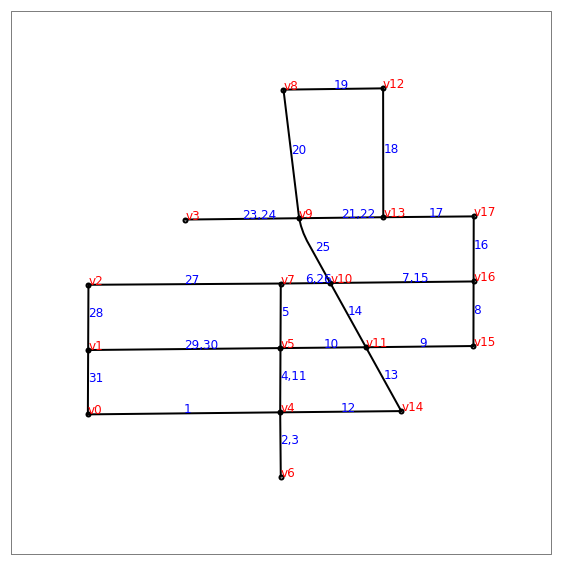

In [6]:
from ensae_projects.challenge.city_tour import euler_path
plot_streets_network(edges_index, edges, vertices, shapes, order=solution, figsize=(10,10));